In [1]:
from keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from numpy import argmax, array_equal
import matplotlib.pyplot as plt
from keras.models import Model
from imgaug import augmenters
from random import randint
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(x_train_1,y_train_1),(x_test_1,y_test_1) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [3]:
x_train_1.shape,y_train_1.shape,x_test_1.shape,y_test_1.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

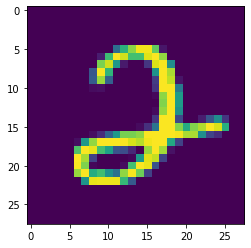

In [4]:
# for plotting the image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img = x_train_1[16]
imgplot = plt.imshow(img)

# 1 AUTOENCODER MODEL

In [0]:
#copying data set to new variables so that we don't make changes to the actual ones unnecessarily
train_x_1 = (x_train_1.astype('float32')/255).copy()

In [0]:
#creating validation data 
from sklearn.model_selection import train_test_split
train_x_1, val_x_1 = train_test_split(train_x_1,test_size=0.2, random_state = 200)

In [7]:
train_x_1.shape,val_x_1.shape

((48000, 28, 28), (12000, 28, 28))

In [0]:
#reshaping the data for model
train_x_1 = np.reshape(train_x_1,(len(train_x_1),28,28,1))
val_x_1 = np.reshape(val_x_1,(len(val_x_1),28,28,1))

In [0]:
#adding NOISE to the data
noise_factor = 0.5
train_x_n_1 = train_x_1 + noise_factor * np.random.normal(loc=0.0,scale=1.0,size=train_x_1.shape)
val_x_n_1 = val_x_1 + noise_factor * np.random.normal(loc=0.0,scale=1.0,size=val_x_1.shape)

In [0]:
#put the values in a range between 0 and 1
train_x_n_1 = np.clip(train_x_n_1,0,1)
val_x_n_1 = np.clip(val_x_n_1,0,1)

In [0]:
# AUTOENCODER MODEL

# input layer
input_layer = Input(shape=(28, 28, 1))

# encoding architecture
encoded_layer1 = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
encoded_layer1 = MaxPool2D( (2, 2), padding='same')(encoded_layer1)
encoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded_layer1)
encoded_layer2 = MaxPool2D( (2, 2), padding='same')(encoded_layer2)
encoded_layer3 = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded_layer2)

# Latent Representatino
latent_view    = MaxPool2D( (2, 2), padding='same')(encoded_layer3)

# decoding architecture
decoded_layer1 = Conv2D(16, (3, 3), activation='relu', padding='same')(latent_view)
decoded_layer1 = UpSampling2D((2, 2))(decoded_layer1)
decoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(decoded_layer1)
decoded_layer2 = UpSampling2D((2, 2))(decoded_layer2)
decoded_layer3 = Conv2D(64, (3, 3), activation='relu')(decoded_layer2)
decoded_layer3 = UpSampling2D((2, 2))(decoded_layer3)

# output layer
output_layer   = Conv2D(1, (3, 3), padding='same')(decoded_layer3)

# compile the model
model_1 = Model(input_layer, output_layer)
model_1.compile(optimizer='adam', loss='mse')

In [12]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 16)          4624      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 16)          0   

In [13]:
#model_1.fit(train_x_n_1,train_x_1,epochs=50,batch_size=1000,shuffle=True,validation_data=(val_x_n_1,val_x_1))
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=5, mode='auto')
history_1 = model_1.fit(train_x_n_1, train_x_1, epochs=50, batch_size=1000, validation_data=(val_x_n_1, val_x_1), callbacks=[early_stopping])

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 8s 174us/step - loss: 0.0713 - val_loss: 0.0584
Epoch 2/50
48000/48000 [==============================] - 2s 40us/step - loss: 0.0517 - val_loss: 0.0461
Epoch 3/50
48000/48000 [==============================] - 2s 40us/step - loss: 0.0431 - val_loss: 0.0402
Epoch 4/50
48000/48000 [==============================] - 2s 40us/step - loss: 0.0376 - val_loss: 0.0352
Epoch 5/50
48000/48000 [==============================] - 2s 40us/step - loss: 0.0338 - val_loss: 0.0320
Epoch 6/50
48000/48000 [==============================] - 2s 40us/step - loss: 0.0308 - val_loss: 0.0296
Epoch 7/50
48000/48000 [==============================] - 2s 40us/step - loss: 0.0287 - val_loss: 0.0277
Epoch 8/50
48000/48000 [==============================] - 2s 40us/step - loss: 0.0271 - val_loss: 0.0263
Epoch 9/50
48000/48000 [==============================] - 2s 40us/step - loss: 0.0259 - val_loss: 0.0252
Epoc

In [0]:
model_1.save_weights('autoencoder.h5')

In [15]:
model_1.evaluate(val_x_n_1,val_x_1)
model_1.save('denoise_ae.model')

12000/12000 [==============================] - 1s 62us/step


In [0]:
no_noise_img = model_1.predict(val_x_n_1)

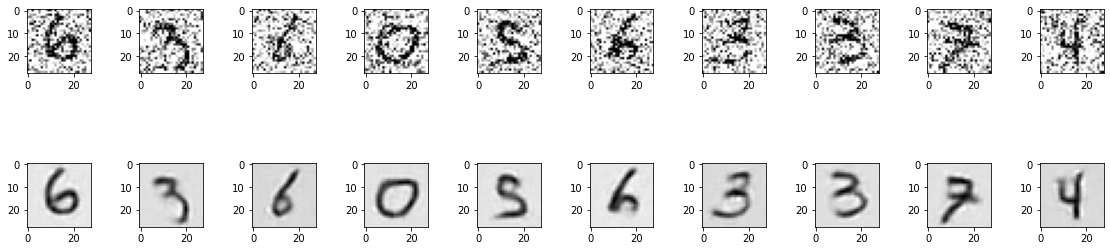

In [17]:
plt.figure(figsize=(40,4))
#printing a few random images
for i in range(2,12):
  ax = plt.subplot(3,20,i+1)
  plt.imshow(val_x_n_1[i].reshape(28,28),cmap="binary")

  ax = plt.subplot(3,20,40+i+1)
  plt.imshow(no_noise_img[i].reshape(28,28),cmap="binary")

plt.show()

In [0]:
#weights_1 = model_1.get_weights()
#len(weights_1)
hist_m1 = history_1.history
#hist_m1.keys()

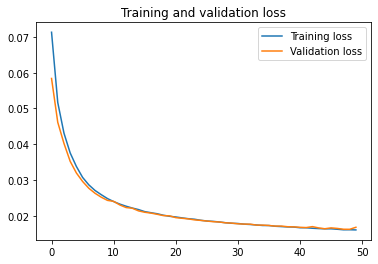

In [19]:
# PLOTTING TRAINING AND VALIDATION LOSS
loss_1 = hist_m1['loss']
val_loss_1 = hist_m1['val_loss']
epochs_1 = range(50)
plt.figure()
plt.plot(epochs_1, loss_1, label='Training loss')
plt.plot(epochs_1, val_loss_1,  label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show();

# 2 CLASSIFIER for Fashion MNIST

In [0]:
import tensorflow as tf
import numpy as np

In [21]:
#get the fashion Mnist Dataset
(x_train_2, y_train_2), (x_test_2, y_test_2) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [22]:
x_train_2.shape,y_train_2.shape,x_test_2.shape,y_test_2.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

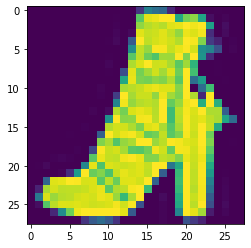

In [23]:
#plotting a sample image from f-mnist
# for plotting the image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img = x_train_2[11]
imgplot = plt.imshow(img)

In [0]:
#rescale the data
train_x_2 = (x_train_2.astype('float32')/255).copy()
test_x_2 = (x_test_2.astype('float32')/255).copy()

train_y_2 = y_train_2.copy()
test_y_2 = y_test_2.copy()

In [0]:
#creating validation data 
from sklearn.model_selection import train_test_split
train_x_2, val_x_2, train_y_2, val_y_2 = train_test_split(train_x_2,train_y_2,test_size=0.2, random_state = 2018 )

In [26]:
#final training validation and test splits
print(train_x_2.shape)
print(val_x_2.shape)
print(test_x_2.shape)
print(train_y_2.shape)
print(val_y_2.shape)
print(test_y_2.shape)

(48000, 28, 28)
(12000, 28, 28)
(10000, 28, 28)
(48000,)
(12000,)
(10000,)


In [0]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D,MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [0]:
im_rows = 28
im_cols = 28
batch_size = 200
im_shape=(im_rows,im_cols,1)

train_x_2 = train_x_2.reshape(train_x_2.shape[0], *im_shape)
test_x_2 = test_x_2.reshape(test_x_2.shape[0],*im_shape)
val_x_2 = val_x_2.reshape(val_x_2.shape[0],*im_shape)

In [29]:
#CHECKING dimensions
print(train_x_2.shape)
print(val_x_2.shape)
print(test_x_2.shape)

print(train_y_2.shape)
print(val_y_2.shape)
print(test_y_2.shape)

(48000, 28, 28, 1)
(12000, 28, 28, 1)
(10000, 28, 28, 1)
(48000,)
(12000,)
(10000,)


In [0]:
IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 10
NO_EPOCHS = 50
BATCH_SIZE = 1000

model_2 = Sequential()
# Add convolution 2D
model_2.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(IMG_ROWS, IMG_COLS, 1)))
model_2.add(MaxPooling2D((2, 2)))
model_2.add(Dropout(0.2))
model_2.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.2))
model_2.add(Conv2D(128, (3, 3), activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Flatten())
model_2.add(Dense(128, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(NUM_CLASSES, activation='softmax'))

In [31]:
model_2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])


model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 3, 3, 128)        

In [32]:
#one hot encoding for the class labels , since we have 10 classes possible
from keras.utils.np_utils import to_categorical

train_y_2 = keras.utils.to_categorical(train_y_2,NUM_CLASSES)
val_y_2 = keras.utils.to_categorical(val_y_2,NUM_CLASSES)
test_y_2 = keras.utils.to_categorical(test_y_2,NUM_CLASSES)
test_y_2.shape

(10000, 10)

In [33]:
train_model_2 = model_2.fit(train_x_2, train_y_2,
                  batch_size=BATCH_SIZE,
                  epochs=NO_EPOCHS,
                  verbose=1,
                  validation_data=(val_x_2, val_y_2))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 1s 26us/step - loss: 1.0840 - accuracy: 0.5972 - val_loss: 0.6250 - val_accuracy: 0.7638
Epoch 2/50
48000/48000 [==============================] - 1s 18us/step - loss: 0.5958 - accuracy: 0.7733 - val_loss: 0.5063 - val_accuracy: 0.8192
Epoch 3/50
48000/48000 [==============================] - 1s 18us/step - loss: 0.5074 - accuracy: 0.8111 - val_loss: 0.4306 - val_accuracy: 0.8444
Epoch 4/50
48000/48000 [==============================] - 1s 18us/step - loss: 0.4512 - accuracy: 0.8338 - val_loss: 0.3885 - val_accuracy: 0.8628
Epoch 5/50
48000/48000 [==============================] - 1s 18us/step - loss: 0.4195 - accuracy: 0.8466 - val_loss: 0.3592 - val_accuracy: 0.8739
Epoch 6/50
48000/48000 [==============================] - 1s 17us/step - loss: 0.3921 - accuracy: 0.8568 - val_loss: 0.3428 - val_accuracy: 0.8756
Epoch 7/50
48000/48000 [==============================] - 1s 18us/st

In [34]:
score_2 = model_2.evaluate(test_x_2, test_y_2, verbose=0)
print('Test loss model 2 :', score_2[0])
print('Test accuracy model 2:', score_2[1])

Test loss model 2 : 0.23717711246013642
Test accuracy model 2: 0.9160000085830688


In [0]:
model_2.save_weights('classifier.h5')
#weights_2 = model_2.get_weights()
#len(weights_2)

In [0]:
import plotly.graph_objs as go
import plotly as ply
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

def create_trace(x,y,ylabel,color):
        trace = go.Scatter(
            x = x,y = y,
            name=ylabel,
            marker=dict(color=color),
            mode = "markers+lines",
            text=x
        )
        return trace

def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1,len(acc)+1))
    
    trace_ta = create_trace(epochs,acc,"Training accuracy", "Green")
    trace_va = create_trace(epochs,val_acc,"Validation accuracy", "Red")
    trace_tl = create_trace(epochs,loss,"Training loss", "Blue")
    trace_vl = create_trace(epochs,val_loss,"Validation loss", "Magenta")
   
    fig = ply.subplots.make_subplots(rows=1,cols=2, subplot_titles=('Training and validation accuracy',
                                                             'Training and validation loss'))
    fig.append_trace(trace_ta,1,1)
    fig.append_trace(trace_va,1,1)
    fig.append_trace(trace_tl,1,2)
    fig.append_trace(trace_vl,1,2)
    fig['layout']['xaxis'].update(title = 'Epoch')
    fig['layout']['xaxis2'].update(title = 'Epoch')
    fig['layout']['yaxis'].update(title = 'Accuracy', range=[0,1])
    fig['layout']['yaxis2'].update(title = 'Loss', range=[0,1])

    
    iplot(fig, filename='accuracy-loss')

In [37]:
plot_accuracy_and_loss(train_model_2);

In [0]:
#get the predictions for the test data
predicted_classes_2 = model_2.predict_classes(test_x_2)
#get the indices to be plotted
true_y_2 = y_test_2.copy()

In [0]:
p_2 = predicted_classes_2[:10000]
y_2 = true_y_2[:10000]
correct_2 = np.nonzero(p_2==y_2)[0]
incorrect_2 = np.nonzero(p_2!=y_2)[0]
#len(incorrect_2)+len(correct_2)

In [40]:
from sklearn.metrics import precision_recall_fscore_support as score
precision_2, recall_2, fscore_2, support_2 = score(y_2, p_2)
print('Classification Model')
print('-----------------------------------------')
print('label| precision recall  fscore   support')
print('-----|-----------------------------------')
for i in range(0,10):
  print(' ',i,' |',"%06.4f"%precision_2[i],'  ',"%06.4f"%recall_2[i],'',"%06.4f"%fscore_2[i],' ',"%04.0f"%support_2[i])

print('-----|-----------------------------------')
print('Avg',' |',"%06.4f"%np.mean(precision_2),'  ',"%06.4f"%np.mean(recall_2),'',"%06.4f"%np.mean(fscore_2))

# "%06.4f"%x515[1][y515],'

Classification Model
-----------------------------------------
label| precision recall  fscore   support
-----|-----------------------------------
  0  | 0.8581    0.8830  0.8704   1000
  1  | 0.9939    0.9790  0.9864   1000
  2  | 0.8432    0.8980  0.8697   1000
  3  | 0.9038    0.9400  0.9216   1000
  4  | 0.8777    0.8470  0.8621   1000
  5  | 0.9860    0.9830  0.9845   1000
  6  | 0.7813    0.7180  0.7483   1000
  7  | 0.9613    0.9700  0.9657   1000
  8  | 0.9809    0.9740  0.9774   1000
  9  | 0.9699    0.9680  0.9690   1000
-----|-----------------------------------
Avg  | 0.9156    0.9160  0.9155


In [0]:
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

def plot_images(data_index,cmap="Blues"):
    # Plot the sample images now
    print("TRUE:PRED")
    f, ax = plt.subplots(4,4, figsize=(8,8))
    for i, indx in enumerate(data_index[:16]):
        ax[i//4, i%4].imshow(test_x_2[indx].reshape(IMG_ROWS,IMG_COLS), cmap=cmap)
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title("{}:{}".format(labels[true_y_2[indx]],labels[predicted_classes_2[indx]]))
    plt.show() 

TRUE:PRED


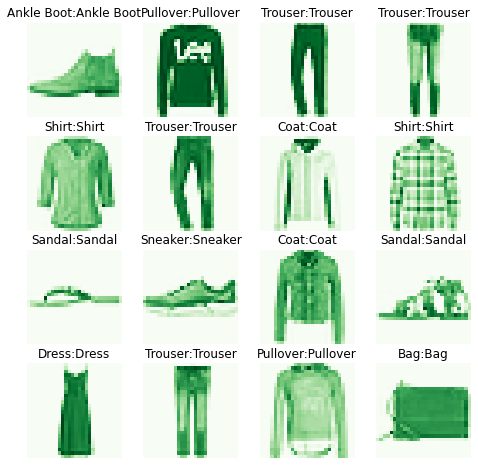

TRUE:PRED


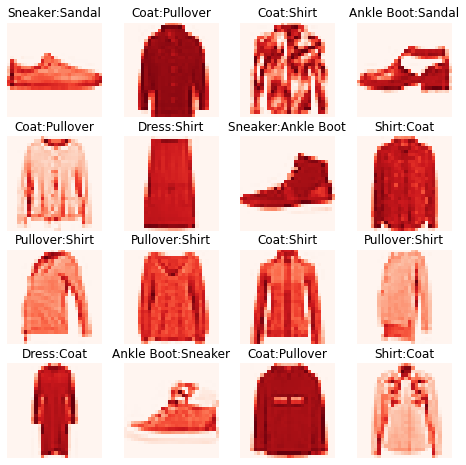

In [42]:
plot_images(correct_2, "Greens")  #correctly classified
plot_images(incorrect_2,"Reds") #incorrectly classified

# 3 FINE TUNING THE MODEL

In [0]:
#get the fashion Mnist Dataset
(x_train_3, y_train_3), (x_test_3, y_test_3) = tf.keras.datasets.fashion_mnist.load_data()

In [0]:
#rescale the data
train_x_3 = (x_train_3.astype('float32')/255).copy()
test_x_3 = (x_test_3.astype('float32')/255).copy()

train_y_3 = y_train_3.copy()
test_y_3 = y_test_3.copy()

In [0]:
from sklearn.model_selection import train_test_split
train_x_3, val_x_3, train_y_3, val_y_3 = train_test_split(train_x_3,train_y_3,test_size=0.2, random_state = 2018 )

In [46]:
#final training validation and test splits
print(train_x_3.shape)
print(val_x_3.shape)
print(test_x_3.shape)
print(train_y_3.shape)
print(val_y_3.shape)
print(test_y_3.shape)

(48000, 28, 28)
(12000, 28, 28)
(10000, 28, 28)
(48000,)
(12000,)
(10000,)


In [0]:
train_x_3 = train_x_3.reshape(train_x_3.shape[0], *im_shape)
test_x_3 = test_x_3.reshape(test_x_3.shape[0],*im_shape)
val_x_3 = val_x_3.reshape(val_x_3.shape[0],*im_shape)

In [48]:
#CHECKING dimensions
print(train_x_3.shape)
print(val_x_3.shape)
print(test_x_3.shape)

print(train_y_3.shape)
print(val_y_3.shape)
print(test_y_3.shape)

(48000, 28, 28, 1)
(12000, 28, 28, 1)
(10000, 28, 28, 1)
(48000,)
(12000,)
(10000,)


In [49]:
#one hot encoding for the class labels , since we have 10 classes possible
train_y_3 = keras.utils.to_categorical(train_y_3,NUM_CLASSES)
val_y_3 = keras.utils.to_categorical(val_y_3,NUM_CLASSES)
test_y_3 = keras.utils.to_categorical(test_y_3,NUM_CLASSES)
test_y_3.shape

(10000, 10)

In [0]:
model_3 = Sequential()

from keras.models import Sequential
from keras.layers import InputLayer

#input_shape=(28, 28, 1)

#model_3.add(InputLayer(input_shape))
model_3.add(InputLayer(input_shape=(28, 28, 1)))
# encoding architecture
model_3.add( Conv2D(64, (3, 3), activation='relu', padding='same',input_shape=(IMG_ROWS, IMG_COLS, 1)) )
model_3.add( MaxPool2D((2, 2) , padding='same' ) )
model_3.add( Conv2D(32, (3, 3), activation='relu', padding='same') )
model_3.add( MaxPool2D((2, 2) , padding='same' ) )
model_3.add( Conv2D(16, (3, 3), activation='relu', padding='same') )

#latent Representation
model_3.add( MaxPool2D( (2, 2), padding='same') )

model_3.add(Flatten())
model_3.add(Dense(128, activation='relu'))
model_3.add(Dense(10, activation='softmax'))

In [0]:
for l1,l2 in zip(model_3.layers[0:6],model_1.layers[1:7]):
    l1.set_weights(l2.get_weights())

In [0]:
#for l1,l2 in zip(model_3.layers[0:13],model_1.layers[1:14]):
#    l1.set_weights(l2.get_weights())

#for layer in model_3.layers[0:14]:
#    layer.trainable = False

In [53]:
model_3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])


model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 16)          4624      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)              

In [54]:
Model_m3 = model_3.fit(train_x_3, train_y_3,
          batch_size=BATCH_SIZE,
          epochs=NO_EPOCHS,
          verbose=1,
          validation_data=(val_x_3, val_y_3))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 1s 22us/step - loss: 1.1252 - accuracy: 0.6146 - val_loss: 0.6626 - val_accuracy: 0.7519
Epoch 2/50
48000/48000 [==============================] - 1s 19us/step - loss: 0.5838 - accuracy: 0.7827 - val_loss: 0.5462 - val_accuracy: 0.7980
Epoch 3/50
48000/48000 [==============================] - 1s 19us/step - loss: 0.4928 - accuracy: 0.8196 - val_loss: 0.4775 - val_accuracy: 0.8325
Epoch 4/50
48000/48000 [==============================] - 1s 19us/step - loss: 0.4388 - accuracy: 0.8415 - val_loss: 0.4247 - val_accuracy: 0.8493
Epoch 5/50
48000/48000 [==============================] - 1s 19us/step - loss: 0.4093 - accuracy: 0.8532 - val_loss: 0.4046 - val_accuracy: 0.8560
Epoch 6/50
48000/48000 [==============================] - 1s 19us/step - loss: 0.3826 - accuracy: 0.8636 - val_loss: 0.3904 - val_accuracy: 0.8588
Epoch 7/50
48000/48000 [==============================] - 1s 19us/st

In [0]:
model_3.save_weights('fine_tuned_model.h5')

In [0]:
score_m3 = model_3.evaluate(test_x_3, test_y_3, verbose=0)

In [57]:
print('Test loss model 3 :', score_m3[0])
print('Test accuracy model 3:', score_m3[1])

Test loss model 3 : 0.26341479016542435
Test accuracy model 3: 0.9085000157356262


In [58]:
plot_accuracy_and_loss(Model_m3);

In [0]:
#get the predictions for the test data
predicted_classes_m3 = model_3.predict_classes(test_x_3)
#get the indices to be plotted
true_y_3 = y_test_3.copy()

In [0]:
p_3 = predicted_classes_m3[:10000]
y_3 = true_y_3[:10000]
correct_3 = np.nonzero(p_3==y_3)[0]
incorrect_3 = np.nonzero(p_3!=y_3)[0]
#len(incorrect_3)+len(correct_3)

In [61]:
from sklearn.metrics import precision_recall_fscore_support as score
precision_3, recall_3, fscore_3, support_3 = score(y_3, p_3)
print('Fine Tuned Autoencoder Model')
print('-----------------------------------------')
print('label| precision recall  fscore   support')
print('-----|-----------------------------------')
for i in range(0,10):
  print(' ',i,' |',"%06.4f"%precision_3[i],'  ',"%06.4f"%recall_3[i],'',"%06.4f"%fscore_3[i],' ',"%04.0f"%support_3[i])

print('-----|-----------------------------------')
print('Avg',' |',"%06.4f"%np.mean(precision_3),'  ',"%06.4f"%np.mean(recall_3),'',"%06.4f"%np.mean(fscore_3))
# "%06.4f"%x515[1][y515],'

Fine Tuned Autoencoder Model
-----------------------------------------
label| precision recall  fscore   support
-----|-----------------------------------
  0  | 0.8111    0.8930  0.8501   1000
  1  | 0.9929    0.9810  0.9869   1000
  2  | 0.8846    0.8200  0.8511   1000
  3  | 0.9328    0.9020  0.9171   1000
  4  | 0.8140    0.8840  0.8476   1000
  5  | 0.9840    0.9830  0.9835   1000
  6  | 0.7655    0.7180  0.7410   1000
  7  | 0.9630    0.9630  0.9630   1000
  8  | 0.9848    0.9700  0.9773   1000
  9  | 0.9623    0.9710  0.9667   1000
-----|-----------------------------------
Avg  | 0.9095    0.9085  0.9084


TRUE:PRED


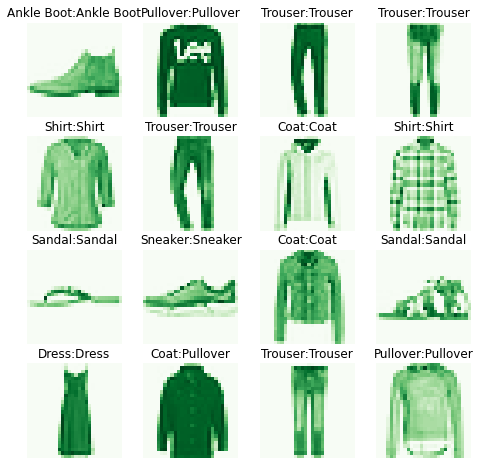

TRUE:PRED


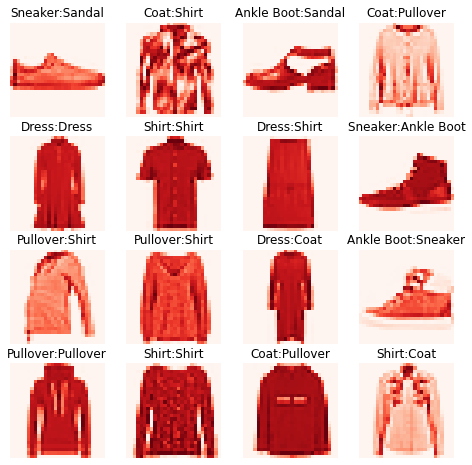

In [62]:
plot_images(correct_3, "Greens")  #correctly classified
plot_images(incorrect_3,"Reds") #incorrectly classified

# Comparing Models

In [63]:
print('                Model 2               Model 3')
print('Test loss :    ', score_2[0],' ',score_m3[0])
print('Test accuracy :', score_2[1],'  ',score_m3[1])

                Model 2               Model 3
Test loss :     0.23717711246013642   0.26341479016542435
Test accuracy : 0.9160000085830688    0.9085000157356262


In [64]:
print('Model 2')
print('-------')
plot_accuracy_and_loss(train_model_2);
print('Model 3')
print('-------')
plot_accuracy_and_loss(Model_m3);

Model 2
-------


Model 3
-------


In [65]:
print('PRECISION, RECALL AND F-SCOREs')
print('Classification Model              Vs.           Fine Tuned Autoencoder Model')
print('-----|--------------------------------------------------------------------------')
print('label| precision recall  fscore   support   | precision recall  fscore   support')
print('-----|--------------------------------------------------------------------------')
for i in range(0,10):
  print(' ',i,' |',"%06.4f"%precision_2[i],'  ',"%06.4f"%recall_2[i],'',"%06.4f"%fscore_2[i],' ',"%04.0f"%support_2[i],'     |',"%06.4f"%precision_3[i],'  ',"%06.4f"%recall_3[i],'',"%06.4f"%fscore_3[i],' ',"%04.0f"%support_3[i])

print('-----|--------------------------------------------------------------------------')
print('Avg',' |',"%06.4f"%np.mean(precision_2),'  ',"%06.4f"%np.mean(recall_2),'',"%06.4f"%np.mean(fscore_2),'            |',"%06.4f"%np.mean(precision_3),'  ',"%06.4f"%np.mean(recall_3),'',"%06.4f"%np.mean(fscore_3))
# "%06.4f"%x515[1][y515],'

PRECISION, RECALL AND F-SCOREs
Classification Model              Vs.           Fine Tuned Autoencoder Model
-----|--------------------------------------------------------------------------
label| precision recall  fscore   support   | precision recall  fscore   support
-----|--------------------------------------------------------------------------
  0  | 0.8581    0.8830  0.8704   1000      | 0.8111    0.8930  0.8501   1000
  1  | 0.9939    0.9790  0.9864   1000      | 0.9929    0.9810  0.9869   1000
  2  | 0.8432    0.8980  0.8697   1000      | 0.8846    0.8200  0.8511   1000
  3  | 0.9038    0.9400  0.9216   1000      | 0.9328    0.9020  0.9171   1000
  4  | 0.8777    0.8470  0.8621   1000      | 0.8140    0.8840  0.8476   1000
  5  | 0.9860    0.9830  0.9845   1000      | 0.9840    0.9830  0.9835   1000
  6  | 0.7813    0.7180  0.7483   1000      | 0.7655    0.7180  0.7410   1000
  7  | 0.9613    0.9700  0.9657   1000      | 0.9630    0.9630  0.9630   1000
  8  | 0.9809    0.9740  